# Previsiones NO2 cierre 2023

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.max_seq_items', None)

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Directorio que contiene los archivos CSV
directorio = '../clean_visuals/predicts23'  # Reemplaza 'ruta_de_tu_carpeta' con la ruta correcta

# Lista para almacenar los DataFrames
dataframes = []

# Obtener la lista de archivos en el directorio
archivos_csv = [archivo for archivo in os.listdir(directorio) if archivo.endswith('.csv')]

# Cargar cada archivo CSV en un DataFrame y agregarlo a la lista
for archivo in archivos_csv:
    ruta_archivo = os.path.join(directorio, archivo)
    df = pd.read_csv(ruta_archivo)
    dataframes.append(df)

# Unir los DataFrames por la derecha (usando la columna como índice)
df_final = pd.concat(dataframes, axis=1)

In [4]:
# Obtener las columnas que tienen 'Unnamed: 0'
columnas_clean = [col for col in df_final.columns if 'Unnamed: 0' not in col]

# Crear un nuevo DataFrame sin las columnas 'Unnamed: 0'
df_clean = df_final[columnas_clean]

In [5]:
df_predicts23 = df_clean.round(2)

In [6]:
df_predicts23

,Escuelas Aguirre,Villaverde,Farolillo,Casa de Campo,Barajas,Moratalaz,Cuatro Caminos,Barrio del Pilar,Vallecas,Méndez Álvaro,Castellana,Retiro,Plaza Castilla,Ensanche Vallecas,Urb Embajada,Plaza Eliptica,San Chinarro,El Pardo,Juan Carlos I,Tres Olivos
0,34.9,37.14,26.75,16.77,33.11,29.64,29.67,28.96,28.91,29.4,29.49,20.66,31.38,30.65,30.44,36.98,24.27,13.29,20.29,21.36


<Figure size 4000x1000 with 0 Axes>

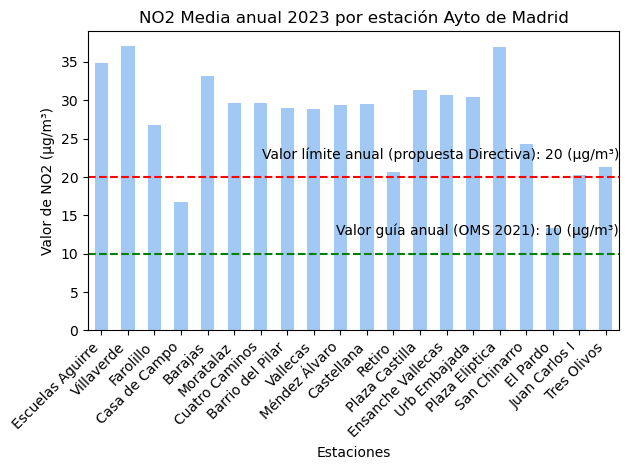

In [7]:
# Paleta de color
palette = sns.color_palette("pastel", len(df_predicts23.columns))

# Transponer el DataFrame para tener las columnas como filas y viceversa
df_transpuesto = df_predicts23.T

# Crear el gráfico de barras verticales con la paleta de colores suaves
plt.figure(figsize=(40, 10))  # Tamaño del gráfico (mayor)
ax = df_transpuesto.plot(kind='bar', color=palette)
plt.title('NO2 Media anual 2023 por estación Ayto de Madrid')  # Título del gráfico
plt.xlabel('Estaciones')  # Etiqueta del eje X
plt.ylabel('Valor de NO2 (µg/m³)')  # Etiqueta del eje Y
plt.xticks(range(len(df_transpuesto.index)), df_transpuesto.index, rotation=45, ha='right')  # Alinear y rotar etiquetas del eje X

# Dibujar líneas horizontales con sus textos anotados
ax.axhline(y=20, color='red', linestyle='--')  # Línea horizontal en el valor 20
ax.text(len(df_transpuesto) - 0.5, 22, 'Valor límite anual (propuesta Directiva): 20 (µg/m³)', ha='right', va='bottom')
ax.axhline(y=10, color='green', linestyle='--')  # Línea horizontal en el valor 10
ax.text(len(df_transpuesto) - 0.5, 12, 'Valor guía anual (OMS 2021): 10 (µg/m³)', ha='right', va='bottom')

plt.tight_layout()  # Ajustar el diseño
plt.legend().remove()  # Eliminar la leyenda
plt.show()